### Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv('databreastcancer_baru.csv', sep=';')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Preprocessing Label Target

In [4]:
# Ubah label M dan B menjadi 0 dan 1
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

drop kolom id

In [11]:
df = df.drop('id', axis=1)

KeyError: "['id'] not found in axis"

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### EDA

Pemeriksaan Jumlah Data & Distribusi Target

Jumlah baris dan kolom: (569, 32)

Jumlah data tiap kelas:
1    357
0    212
Name: diagnosis, dtype: int64


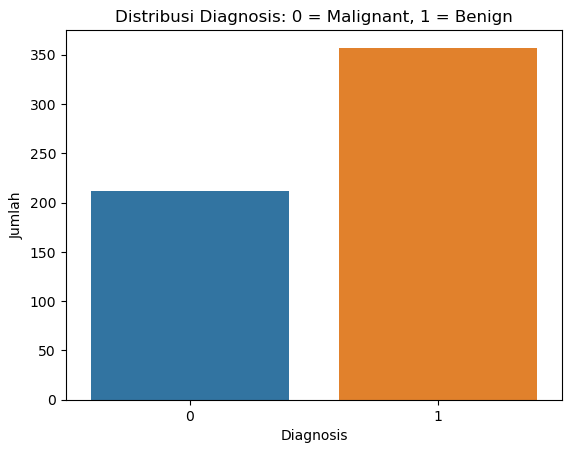

In [5]:
print("Jumlah baris dan kolom:", df.shape)
print("\nJumlah data tiap kelas:")
print(df['diagnosis'].value_counts())

# Visualisasi distribusi target
sns.countplot(x='diagnosis', data=df)
plt.title('Distribusi Diagnosis: 0 = Malignant, 1 = Benign')
plt.xlabel('Diagnosis')
plt.ylabel('Jumlah')
plt.show()

Heatmap Korelasi Antar Fitur

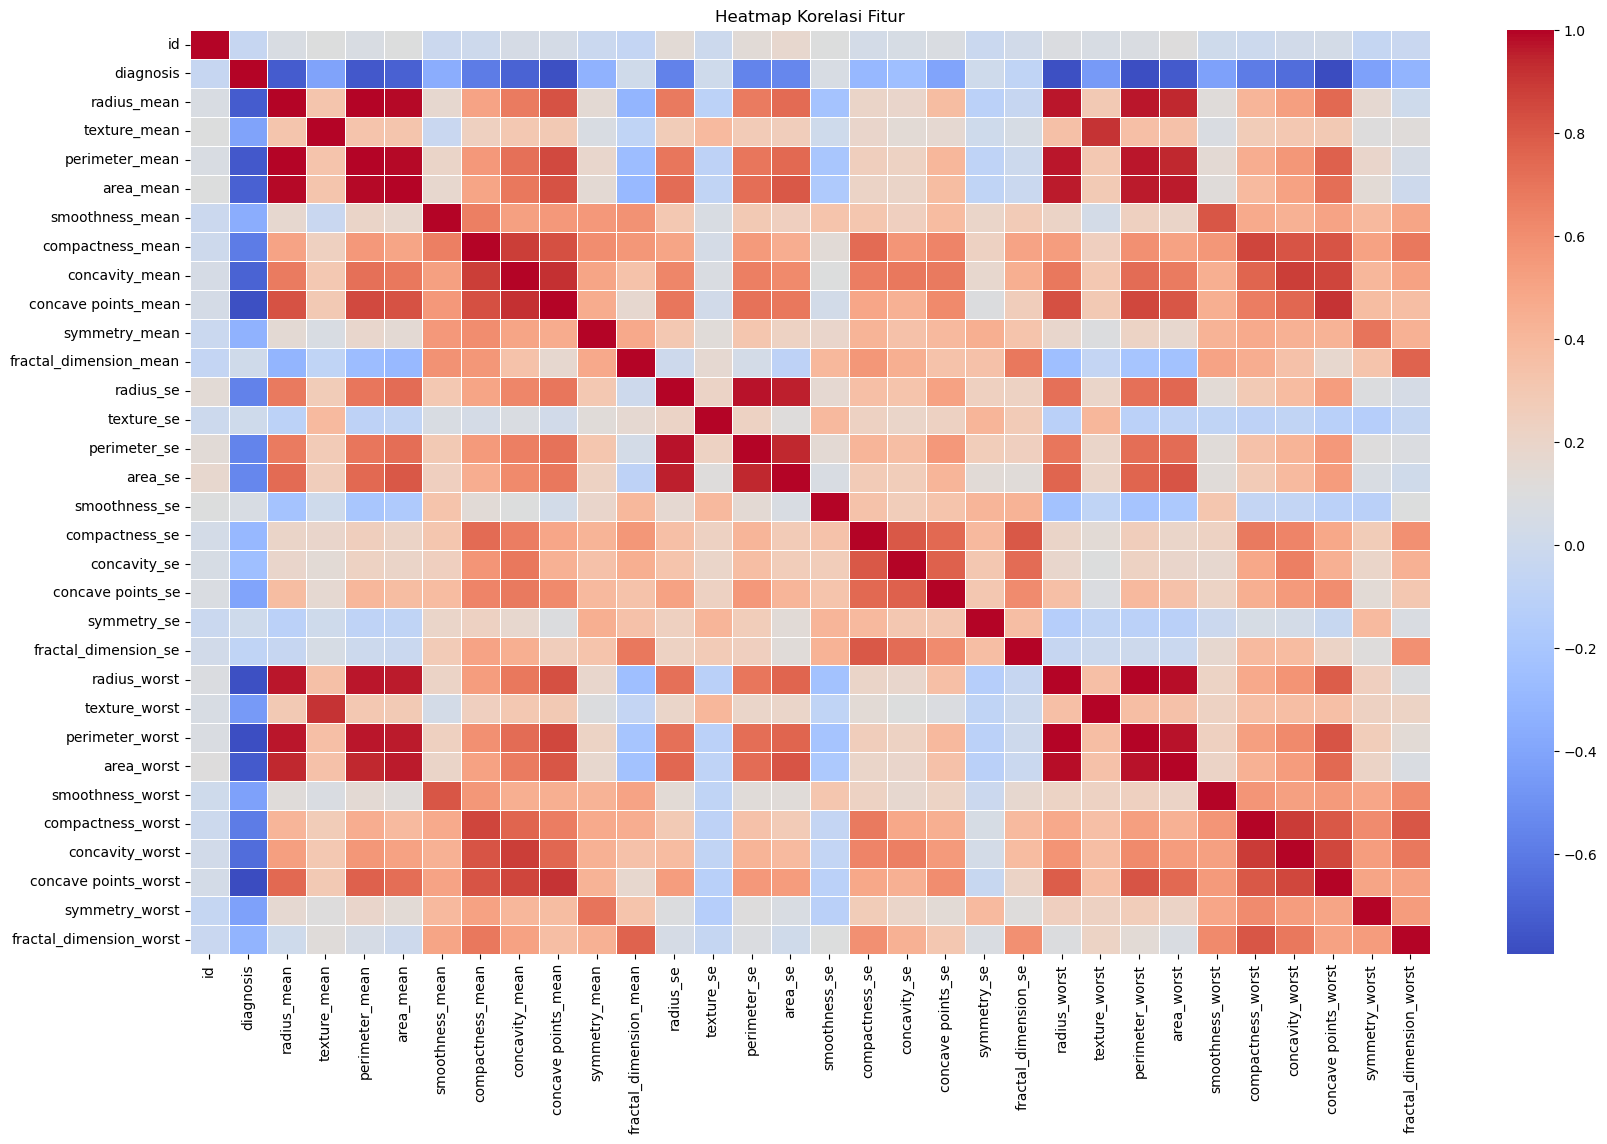

In [6]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur')
plt.show()

In [7]:
df.corr()['diagnosis'].abs().sort_values(ascending=False).head(10)

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
Name: diagnosis, dtype: float64

Boxplot Fitur Penting

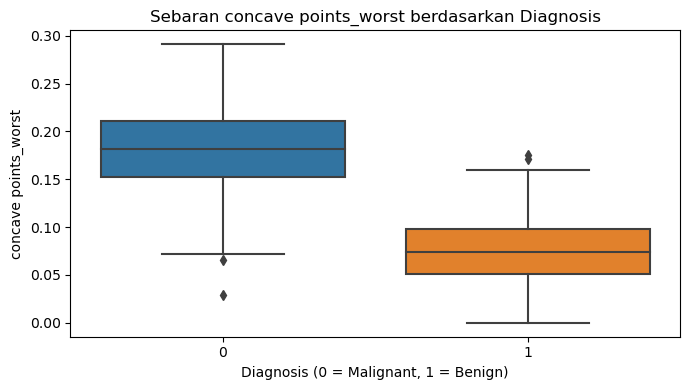

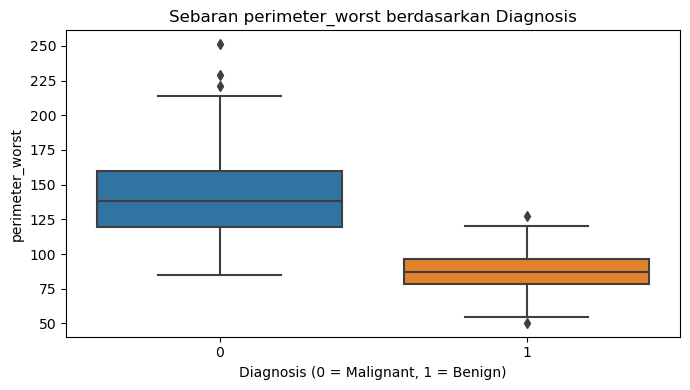

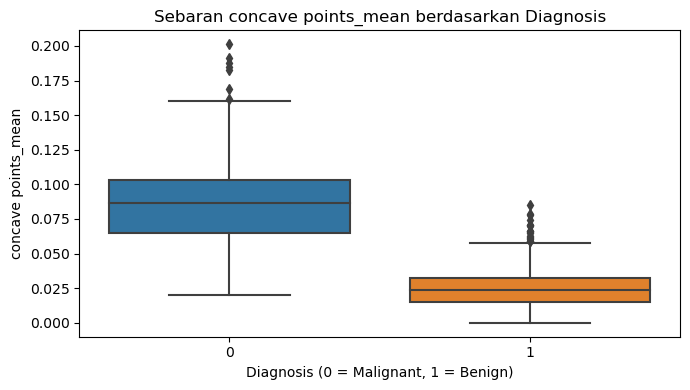

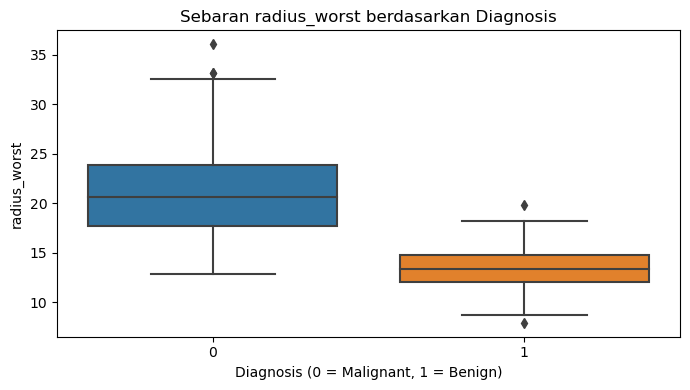

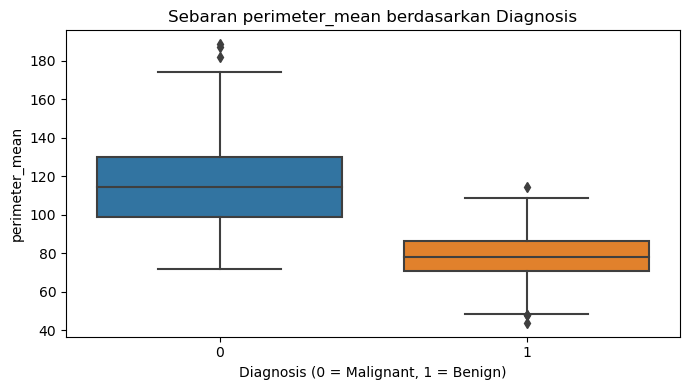

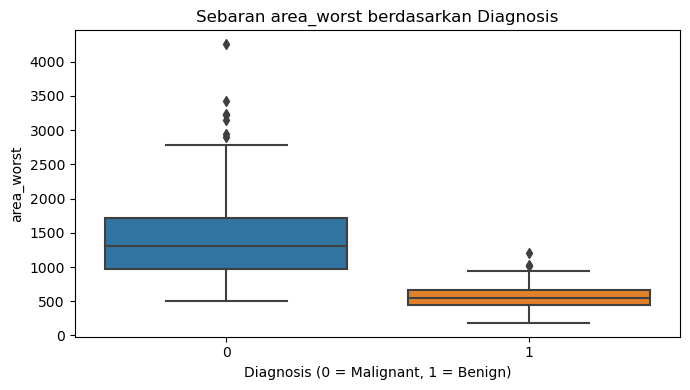

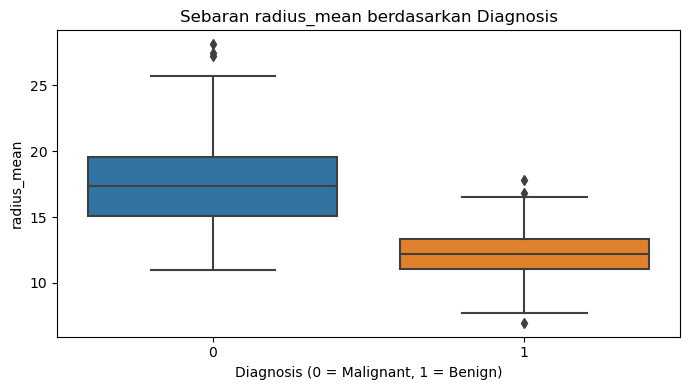

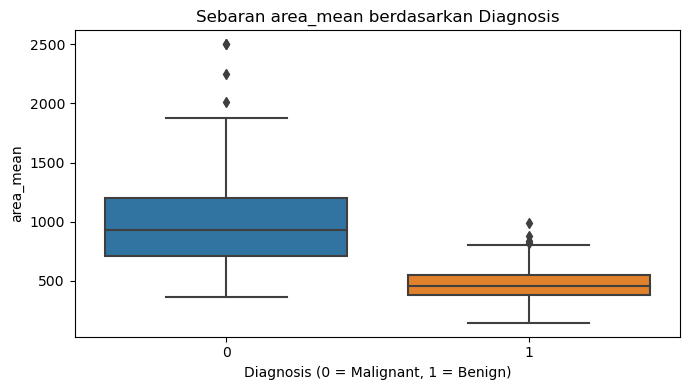

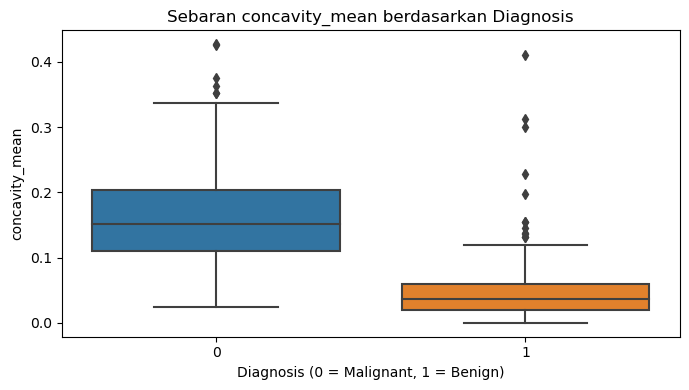

In [8]:
fitur_penting = ['concave points_worst', 'perimeter_worst', 'concave points_mean',
 'radius_worst', 'perimeter_mean', 'area_worst', 
 'radius_mean', 'area_mean', 'concavity_mean']

for fitur in fitur_penting:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x='diagnosis', y=fitur, data=df)
    plt.title(f'Sebaran {fitur} berdasarkan Diagnosis')
    plt.xlabel('Diagnosis (0 = Malignant, 1 = Benign)')
    plt.ylabel(fitur)
    plt.tight_layout()
    plt.show()